# Import The Libraries

In [2]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten , Activation

# Rearrange the data creating our train and test arrays

In [3]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
#load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# train_images=train_images1[:5000,:]
# train_labels=train_labels1[:5000]
# test_images=test_images1[:500,:]
# test_labels=test_labels1[:500]

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
#function to make the labeles as one hot vector
def label_reshape(arr_labele):
    label_vector=[]
    for i in range(len(arr_labele)):
        label_vector.append([0 for _ in range(10)])
        x = arr_labele[i]
        label_vector[i][x] = 1
    return label_vector  

In [6]:
train_labels = label_reshape(train_labels)
test_labels = label_reshape(test_labels)

In [7]:
train_labels[5]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [8]:
#checking the arrays
train_images.shape , type(train_images) , test_images.shape , type(test_images)

((60000, 28, 28), numpy.ndarray, (10000, 28, 28), numpy.ndarray)

# Plotting numbers

In [9]:
#function to plot the number
def plot_img(mnist_index):
    image = mnist_index
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

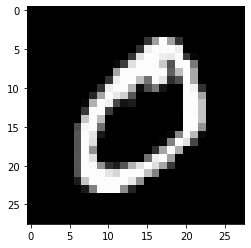

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [10]:
#test the function
plot_img(train_images[1])
train_labels[1]

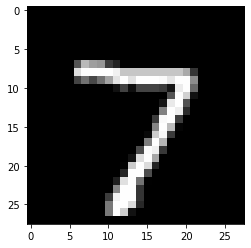

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [11]:
#test function
plot_img(test_images[0])
test_labels[0]

#Normalize the Data and Resahpe the img

In [12]:
train_images = tf.keras.utils.normalize(train_images,axis = 1)
test_images = tf.keras.utils.normalize(test_images,axis = 1)

#Resahpe the images to make it suitable

In [13]:
#function to reshape
def reshape_img(img):
  img_size = img.shape[1]
  img = img.reshape(-1,img_size,img_size,1)
  return img

In [14]:
#increase 1 dim for filter operation
train_images = reshape_img(np.array(train_images))
test_images = reshape_img(np.array(test_images))

print(train_images.shape,test_images.shape)

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# **Creat our CNN**




##Model 1

In [ ]:
#creat the model
model_1 = Sequential()

#conv layers

##first CNN layer
model_1.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_1.add(Activation("relu"))

##second CNN layer
model_1.add(Conv2D(32,(2,2)))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())

#FC layers

##first FC layer
model_1.add(Dense(32))
model_1.add(Activation("relu"))

##second FC layer
model_1.add(Dense(16))
model_1.add(Activation("relu"))

# softmax classifier
model_1.add(Dense(10))
model_1.add(Activation("softmax"))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 16)        80        
                                                                 
 activation (Activation)     (None, 27, 27, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_1 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                        

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_1.fit(train_images,train_labels,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 6ms/step - loss: 0.8557 - accuracy: 0.7446
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2634 - accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2106 - accuracy: 0.9369
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1804 - accuracy: 0.9451
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1628 - accuracy: 0.9509
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1502 - accuracy: 0.9537
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1405 - accuracy: 0.9562
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1314 - accuracy: 0.9588
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1238 - accuracy: 0.9612
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
loss, acc =model_1.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.1162 - accuracy: 0.9646
loss = 0.11615519970655441
accuracy = 0.9646000266075134


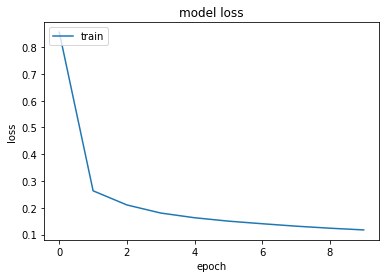

In [ ]:
def plot_losses(h):  
    plt.plot(h.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

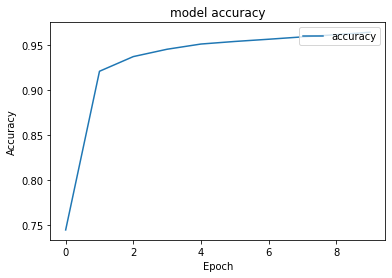

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 2

In [ ]:
#creat the model
model_2 = Sequential()

#conv layers

##first CNN layer
model_2.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_2.add(Activation("relu"))

##second CNN layer
model_2.add(Conv2D(32,(2,2)))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())

#FC layers

##first FC layer
model_2.add(Dense(32))
model_2.add(Activation("relu"))

##second FC layer
model_2.add(Dense(16))
model_2.add(Activation("relu"))

# softmax classifier
model_2.add(Dense(10))
model_2.add(Activation("softmax"))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_5 (Activation)   (None, 27, 27, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_6 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_2.fit(train_images,train_labels,epochs=12,batch_size=32)

Epoch 1/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8820 - accuracy: 0.7399
Epoch 2/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2678 - accuracy: 0.9198
Epoch 3/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2131 - accuracy: 0.9359
Epoch 4/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1852 - accuracy: 0.9443
Epoch 5/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1644 - accuracy: 0.9499
Epoch 6/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1481 - accuracy: 0.9548
Epoch 7/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1364 - accuracy: 0.9587
Epoch 8/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1267 - accuracy: 0.9617
Epoch 9/12
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1186 - accuracy: 0.9632
Epoch 10/12
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
loss, acc =model_2.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.1053 - accuracy: 0.9686
loss = 0.1052524521946907
accuracy = 0.9685999751091003


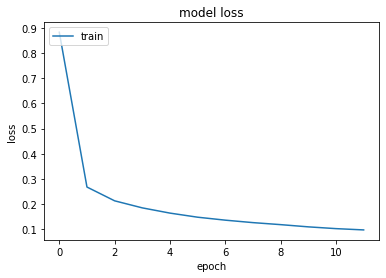

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

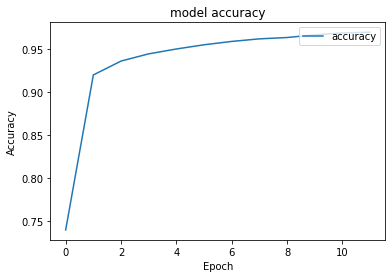

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 3

In [ ]:
#creat the model
model_3 = Sequential()

#conv layers

##first CNN layer
model_3.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_3.add(Activation("relu"))

##second CNN layer
model_3.add(Conv2D(32,(2,2)))
model_3.add(Activation("relu"))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())

#FC layers

##first FC layer
model_3.add(Dense(32))
model_3.add(Activation("relu"))

##second FC layer
model_3.add(Dense(16))
model_3.add(Activation("relu"))

# softmax classifier
model_3.add(Dense(10))
model_3.add(Activation("softmax"))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_10 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_11 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_3.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9856 - accuracy: 0.7012
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2664 - accuracy: 0.9212
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2076 - accuracy: 0.9375
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1782 - accuracy: 0.9466
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1591 - accuracy: 0.9512
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1425 - accuracy: 0.9555
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1301 - accuracy: 0.9607
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1191 - accuracy: 0.9629
Epoch 9/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1107 - accuracy: 0.9661
Epoch 10/15
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
loss, acc =model_3.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0813 - accuracy: 0.9744
loss = 0.08128124475479126
accuracy = 0.974399983882904


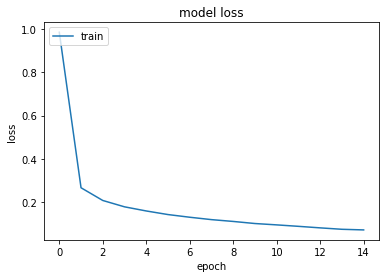

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

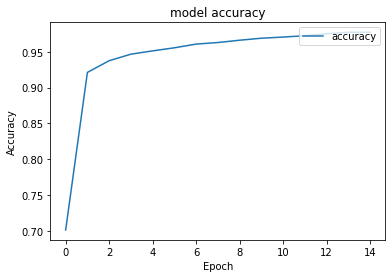

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 4

In [ ]:
#creat the model
model_4 = Sequential()

#conv layers

##first CNN layer
model_4.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_4.add(Activation("relu"))

##second CNN layer
model_4.add(Conv2D(32,(2,2)))
model_4.add(Activation("relu"))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())

#FC layers

##first FC layer
model_4.add(Dense(32))
model_4.add(Activation("relu"))

##second FC layer
model_4.add(Dense(16))
model_4.add(Activation("relu"))

# softmax classifier
model_4.add(Dense(10))
model_4.add(Activation("softmax"))

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_15 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_16 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
model_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_4.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4098 - accuracy: 0.8736
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1670 - accuracy: 0.9482
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1095 - accuracy: 0.9669
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0816 - accuracy: 0.9750
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0626 - accuracy: 0.9802
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0429 - accuracy: 0.9866
Epoch 8/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0344 - accuracy: 0.9890
Epoch 9/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0291 - accuracy: 0.9907
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_4.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0800 - accuracy: 0.9815
loss = 0.07995688915252686
accuracy = 0.9815000295639038


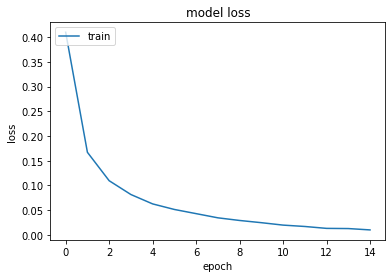

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

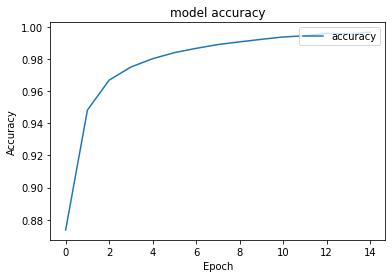

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 5

In [ ]:
#creat the model
model_5 = Sequential()

#conv layers

##first CNN layer
model_5.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_5.add(Activation("relu"))

##second CNN layer
model_5.add(Conv2D(32,(2,2)))
model_5.add(Activation("relu"))
model_5.add(MaxPooling2D(pool_size=(2, 2)))

model_5.add(Flatten())

#FC layers

##first FC layer
model_5.add(Dense(32))
model_5.add(Activation("relu"))

##second FC layer
model_5.add(Dense(16))
model_5.add(Activation("relu"))

# softmax classifier
model_5.add(Dense(10))
model_5.add(Activation("softmax"))

model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_20 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_21 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
model_5.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.08), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_5.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3782 - accuracy: 0.8820
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1529 - accuracy: 0.9536
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0952 - accuracy: 0.9713
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0676 - accuracy: 0.9795
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0393 - accuracy: 0.9877
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0244 - accuracy: 0.9919
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_5.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0787 - accuracy: 0.9814
loss = 0.07870164513587952
accuracy = 0.9814000129699707


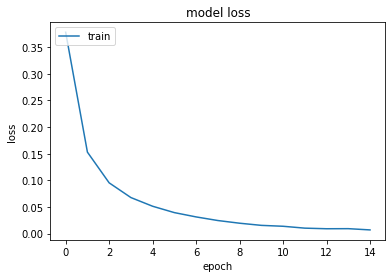

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

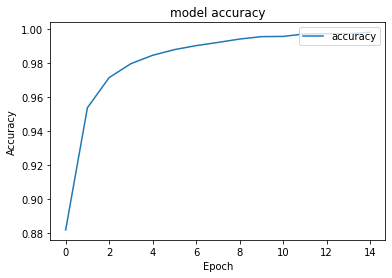

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 6

In [ ]:
#creat the model
model_6 = Sequential()

#conv layers

##first CNN layer
model_6.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_6.add(Activation("relu"))

##second CNN layer
model_6.add(Conv2D(32,(2,2)))
model_6.add(Activation("relu"))
model_6.add(MaxPooling2D(pool_size=(2, 2)))

model_6.add(Flatten())

#FC layers

##first FC layer
model_6.add(Dense(32))
model_6.add(Activation("relu"))

##second FC layer
model_6.add(Dense(16))
model_6.add(Activation("relu"))

# softmax classifier
model_6.add(Dense(10))
model_6.add(Activation("softmax"))

model_6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_25 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_26 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
model_6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_6.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5479 - accuracy: 0.8242
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2125 - accuracy: 0.9352
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1690 - accuracy: 0.9485
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1388 - accuracy: 0.9579
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1141 - accuracy: 0.9650
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0927 - accuracy: 0.9718
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0753 - accuracy: 0.9769
Epoch 8/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0637 - accuracy: 0.9812
Epoch 9/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 10/15
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
loss, acc =model_6.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0691 - accuracy: 0.9817
loss = 0.06914949417114258
accuracy = 0.9817000031471252


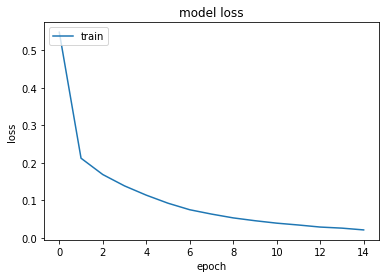

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

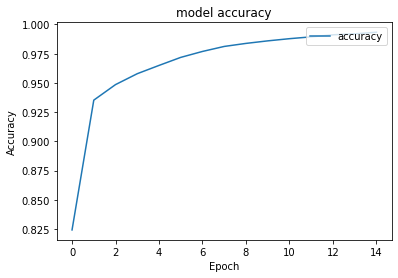

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 7

In [ ]:
#creat the model
model_7 = Sequential()

#conv layers

##first CNN layer
model_7.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_7.add(Activation("relu"))
model_7.add(MaxPooling2D(pool_size=(2, 2)))

model_7.add(Flatten())

#FC layers

##first FC layer
model_7.add(Dense(16))
model_7.add(Activation("relu"))

# softmax classifier
model_7.add(Dense(10))
model_7.add(Activation("softmax"))

model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_30 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2704)              0         
                                                                 
 dense_18 (Dense)            (None, 16)                43280     
                                                                 
 activation_31 (Activation)  (None, 16)                0         
                                                      

In [ ]:
model_7.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_7.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0898 - accuracy: 0.9733
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0838 - accuracy: 0.9751
Epoch 3/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0792 - accuracy: 0.9761
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9778
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0703 - accuracy: 0.9787
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0669 - accuracy: 0.9802
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0634 - accuracy: 0.9809
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9812
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0573 - accuracy: 0.9827
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.055

In [ ]:
loss, acc =model_7.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0906 - accuracy: 0.9742
loss = 0.09055687487125397
accuracy = 0.9742000102996826


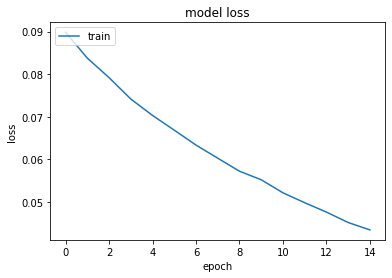

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

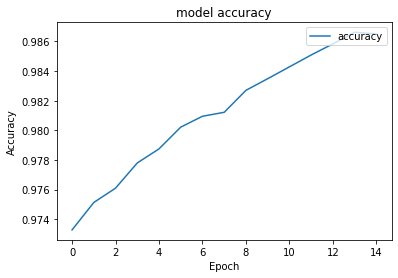

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 8

In [ ]:
#creat the model
model_8 = Sequential()

#conv layers

##first CNN layer
model_8.add(Conv2D(32,(2,2),input_shape = train_images.shape[1:]))
model_8.add(Activation("relu"))
model_8.add(MaxPooling2D(pool_size=(2, 2)))

model_8.add(Flatten())

#FC layers

##first FC layer
model_8.add(Dense(32))
model_8.add(Activation("relu"))

##second FC layer
model_8.add(Dense(16))
model_8.add(Activation("relu"))

# softmax classifier
model_8.add(Dense(10))
model_8.add(Activation("softmax"))

model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 activation_33 (Activation)  (None, 27, 27, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 5408)              0         
                                                                 
 dense_20 (Dense)            (None, 32)                173088    
                                                                 
 activation_34 (Activation)  (None, 32)                0         
                                                      

In [ ]:
model_8.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_8.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5722 - accuracy: 0.8270
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2455 - accuracy: 0.9252
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1898 - accuracy: 0.9425
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1589 - accuracy: 0.9521
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1388 - accuracy: 0.9584
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1239 - accuracy: 0.9622
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122 - accuracy: 0.9657
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1023 - accuracy: 0.9687
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0936 - accuracy: 0.9710
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.084

In [ ]:
loss, acc =model_8.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0871 - accuracy: 0.9734
loss = 0.08710829168558121
accuracy = 0.9733999967575073


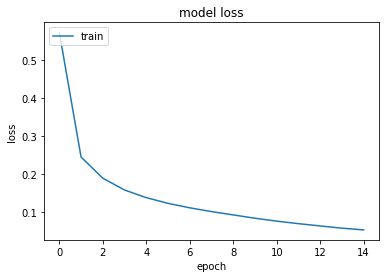

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

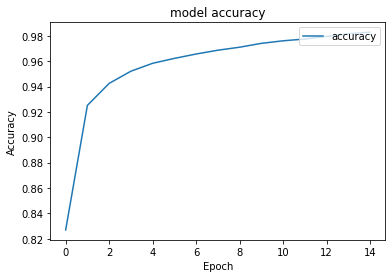

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 9

In [ ]:
#creat the model
model_9 = Sequential()

#conv layers

##first CNN layer
model_9.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_9.add(Activation("relu"))

##second CNN layer
model_9.add(Conv2D(32,(2,2)))
model_9.add(Activation("relu"))
model_9.add(MaxPooling2D(pool_size=(2, 2)))

model_9.add(Flatten())

#FC layers

##first FC layer
model_9.add(Dense(32))
model_9.add(Activation("relu"))

# softmax classifier
model_9.add(Dense(10))
model_9.add(Activation("softmax"))

model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_37 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_38 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 5408)              0         
                                                      

In [ ]:
model_9.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_9.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4803 - accuracy: 0.8561
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2062 - accuracy: 0.9383
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1609 - accuracy: 0.9514
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1310 - accuracy: 0.9603
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1076 - accuracy: 0.9672
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0911 - accuracy: 0.9724
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0782 - accuracy: 0.9757
Epoch 8/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0683 - accuracy: 0.9792
Epoch 9/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0595 - accuracy: 0.9813
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
loss, acc =model_9.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0582 - accuracy: 0.9813
loss = 0.0582338385283947
accuracy = 0.9812999963760376


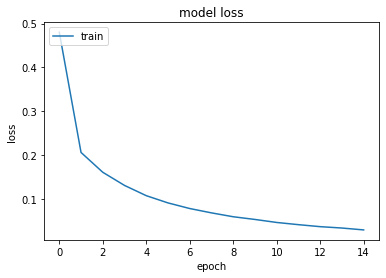

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

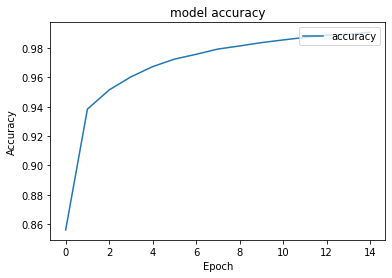

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 10

In [ ]:
#creat the model
model_10 = Sequential()

#conv layers

##first CNN layer
model_10.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_10.add(Activation("relu"))

##second CNN layer
model_10.add(Conv2D(32,(2,2)))
model_10.add(Activation("relu"))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_10.add(Conv2D(64,(2,2)))
model_10.add(Activation("relu"))
model_10.add(MaxPooling2D(pool_size=(2, 2)))

model_10.add(Flatten())

#FC layers

##first FC layer
model_10.add(Dense(64))
model_10.add(Activation("relu"))

##second FC layer
model_10.add(Dense(32))
model_10.add(Activation("relu"))

# softmax classifier
model_10.add(Dense(10))
model_10.add(Activation("softmax"))

model_10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_41 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_42 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 64)        8256      
                                                      

In [ ]:
model_10.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_10.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5143 - accuracy: 0.8402
Epoch 2/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1232 - accuracy: 0.9614
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0844 - accuracy: 0.9733
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0652 - accuracy: 0.9796
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0540 - accuracy: 0.9828
Epoch 6/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0452 - accuracy: 0.9852
Epoch 7/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0381 - accuracy: 0.9882
Epoch 8/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0324 - accuracy: 0.9896
Epoch 9/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 10/15
1875/1875 [==============================] - 13s 7ms/step - l

In [ ]:
loss, acc =model_10.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0534 - accuracy: 0.9845
loss = 0.053412292152643204
accuracy = 0.984499990940094


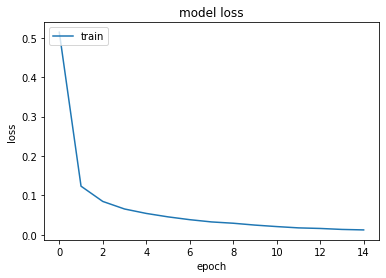

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

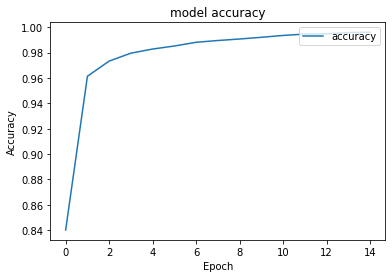

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 11

In [ ]:
#creat the model
model_11 = Sequential()

#conv layers

##first CNN layer
model_11.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_11.add(Activation("relu"))

##second CNN layer
model_11.add(Conv2D(32,(2,2)))
model_11.add(Activation("relu"))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_11.add(Conv2D(64,(2,2)))
model_11.add(Activation("relu"))
model_11.add(MaxPooling2D(pool_size=(2, 2)))

model_11.add(Flatten())

#FC layers

##first FC layer
model_11.add(Dense(64))
model_11.add(Activation("relu"))

##second FC layer
model_11.add(Dense(32))
model_11.add(Activation("relu"))

##third FC layer
model_11.add(Dense(16))
model_11.add(Activation("relu"))

# softmax classifier
model_11.add(Dense(10))
model_11.add(Activation("softmax"))

model_11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_47 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_48 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_11.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_11.fit(train_images,train_labels,epochs=15,batch_size=32)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5615 - accuracy: 0.8207
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1285 - accuracy: 0.9603
Epoch 3/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0921 - accuracy: 0.9716
Epoch 4/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0709 - accuracy: 0.9772
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0593 - accuracy: 0.9809
Epoch 6/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0489 - accuracy: 0.9846
Epoch 7/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0426 - accuracy: 0.9865
Epoch 8/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0372 - accuracy: 0.9880
Epoch 9/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0313 - accuracy: 0.9903
Epoch 10/15
1875/1875 [==============================] - 14s 7ms/step - l

In [ ]:
loss, acc =model_11.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0572 - accuracy: 0.9849
loss = 0.057234711945056915
accuracy = 0.9848999977111816


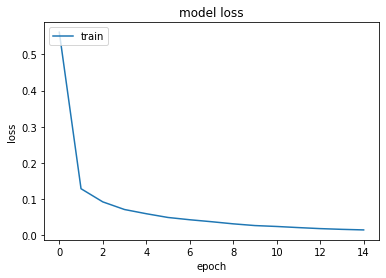

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

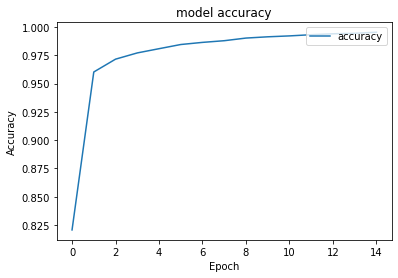

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()
plot_accuracies(history)

##Model 12

In [ ]:
#creat the model
model_12 = Sequential()

#conv layers

##first CNN layer
model_12.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_12.add(Activation("relu"))

##second CNN layer
model_12.add(Conv2D(32,(2,2)))
model_12.add(Activation("relu"))
model_12.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_12.add(Conv2D(64,(2,2)))
model_12.add(Activation("relu"))
model_12.add(MaxPooling2D(pool_size=(2, 2)))

model_12.add(Flatten())

#FC layers

##first FC layer
model_12.add(Dense(64))
model_12.add(Activation("relu"))

##second FC layer
model_12.add(Dense(32))
model_12.add(Activation("relu"))

# softmax classifier
model_12.add(Dense(10))
model_12.add(Activation("softmax"))

model_12.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_54 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_55 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_12.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_12.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.3888 - accuracy: 0.8787
Epoch 2/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0963 - accuracy: 0.9700
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0683 - accuracy: 0.9787
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0529 - accuracy: 0.9832
Epoch 5/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0424 - accuracy: 0.9868
Epoch 6/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0354 - accuracy: 0.9888
Epoch 7/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0293 - accuracy: 0.9904
Epoch 8/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0243 - accuracy: 0.9921
Epoch 9/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0205 - accuracy: 0.9934
Epoch 10/15
3000/3000 [==============================] - 18s 6ms/step - l

In [ ]:
loss, acc =model_12.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0620 - accuracy: 0.9879
loss = 0.062002167105674744
accuracy = 0.9879000186920166


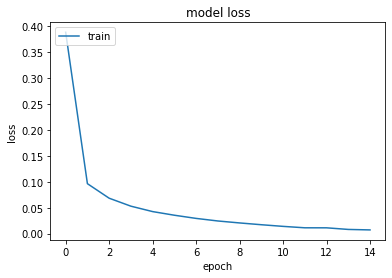

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

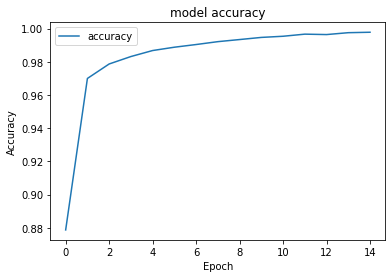

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 13

In [ ]:
#creat the model
model_13 = Sequential()

#conv layers

##first CNN layer
model_13.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_13.add(Activation("relu"))

##second CNN layer
model_13.add(Conv2D(32,(2,2)))
model_13.add(Activation("relu"))
model_13.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_13.add(Conv2D(64,(2,2)))
model_13.add(Activation("relu"))
model_13.add(MaxPooling2D(pool_size=(2, 2)))

model_13.add(Flatten())

#FC layers

##first FC layer
model_13.add(Dense(64))
model_13.add(Activation("relu"))

##second FC layer
model_13.add(Dense(32))
model_13.add(Activation("relu"))

# softmax classifier
model_13.add(Dense(10))
model_13.add(Activation("softmax"))

model_13.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_60 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_61 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_13.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_13.fit(train_images,train_labels,epochs=15,batch_size=64)

Epoch 1/15
938/938 [==============================] - 9s 8ms/step - loss: 0.7426 - accuracy: 0.7551
Epoch 2/15
938/938 [==============================] - 8s 8ms/step - loss: 0.1743 - accuracy: 0.9457
Epoch 3/15
938/938 [==============================] - 8s 8ms/step - loss: 0.1113 - accuracy: 0.9653
Epoch 4/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0868 - accuracy: 0.9725
Epoch 5/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0737 - accuracy: 0.9770
Epoch 6/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0636 - accuracy: 0.9802
Epoch 7/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0553 - accuracy: 0.9826
Epoch 8/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0509 - accuracy: 0.9839
Epoch 9/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0448 - accuracy: 0.9851
Epoch 10/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0409 - accuracy: 0.9863

In [ ]:
loss, acc =model_13.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0824 - accuracy: 0.9744
loss = 0.08243045210838318
accuracy = 0.974399983882904


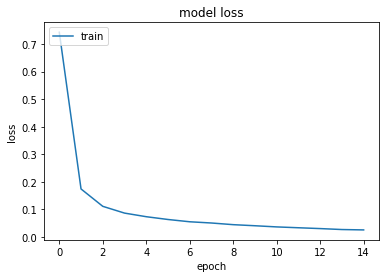

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

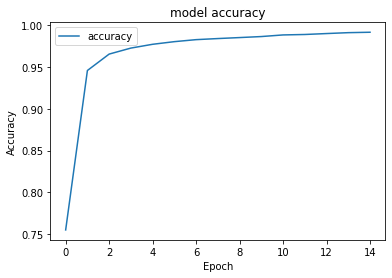

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 14

In [ ]:
#creat the model
model_14 = Sequential()

#conv layers

##first CNN layer
model_14.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_14.add(Activation("sigmoid"))

##second CNN layer
model_14.add(Conv2D(32,(2,2)))
model_14.add(Activation("sigmoid"))
model_14.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_14.add(Conv2D(64,(2,2)))
model_14.add(Activation("sigmoid"))
model_14.add(MaxPooling2D(pool_size=(2, 2)))

model_14.add(Flatten())

#FC layers

##first FC layer
model_14.add(Dense(64))
model_14.add(Activation("sigmoid"))

##second FC layer
model_14.add(Dense(32))
model_14.add(Activation("sigmoid"))

# softmax classifier
model_14.add(Dense(10))
model_14.add(Activation("softmax"))

model_14.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_66 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_67 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_14.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_14.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3053 - accuracy: 0.1059
Epoch 2/15
3000/3000 [==============================] - 17s 6ms/step - loss: 2.3039 - accuracy: 0.1053
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3035 - accuracy: 0.1074
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3029 - accuracy: 0.1090
Epoch 5/15
3000/3000 [==============================] - 17s 6ms/step - loss: 2.3028 - accuracy: 0.1087
Epoch 6/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3026 - accuracy: 0.1084
Epoch 7/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3026 - accuracy: 0.1103
Epoch 8/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3024 - accuracy: 0.1096
Epoch 9/15
3000/3000 [==============================] - 18s 6ms/step - loss: 2.3022 - accuracy: 0.1102
Epoch 10/15
3000/3000 [==============================] - 17s 6ms/step - l

In [ ]:
loss, acc =model_14.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 2.3012 - accuracy: 0.1135
loss = 2.3012008666992188
accuracy = 0.11349999904632568


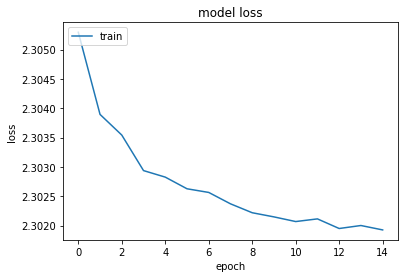

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

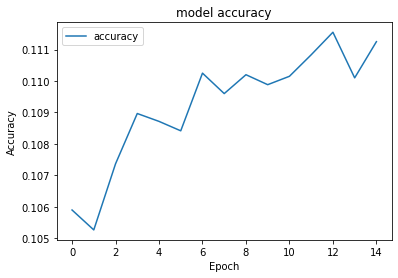

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 15

In [ ]:
#creat the model
model_15 = Sequential()

#conv layers

##first CNN layer
model_15.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_15.add(Activation("tanh"))

##second CNN layer
model_15.add(Conv2D(32,(2,2)))
model_15.add(Activation("tanh"))
model_15.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_15.add(Conv2D(64,(2,2)))
model_15.add(Activation("tanh"))
model_15.add(MaxPooling2D(pool_size=(2, 2)))

model_15.add(Flatten())

#FC layers

##first FC layer
model_15.add(Dense(64))
model_15.add(Activation("tanh"))

##second FC layer
model_15.add(Dense(32))
model_15.add(Activation("tanh"))

# softmax classifier
model_15.add(Dense(10))
model_15.add(Activation("softmax"))

model_15.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_72 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_73 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_15.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_15.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.3274 - accuracy: 0.9060
Epoch 2/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0969 - accuracy: 0.9720
Epoch 3/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0634 - accuracy: 0.9821
Epoch 4/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0472 - accuracy: 0.9866
Epoch 5/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0364 - accuracy: 0.9895
Epoch 6/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0281 - accuracy: 0.9923
Epoch 7/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0229 - accuracy: 0.9937
Epoch 8/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0182 - accuracy: 0.9953
Epoch 9/15
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0141 - accuracy: 0.9966
Epoch 10/15
3000/3000 [==============================] - 18s 6ms/step - l

In [ ]:
loss, acc =model_15.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0379 - accuracy: 0.9886
loss = 0.037872325628995895
accuracy = 0.9886000156402588


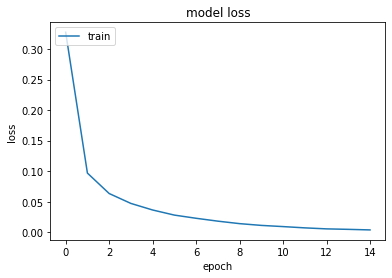

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

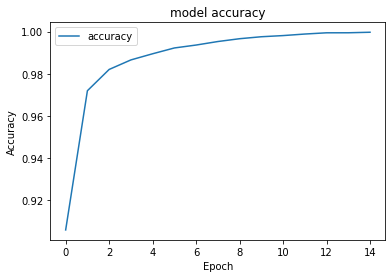

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 16

In [ ]:
#creat the model
model_16 = Sequential()

#conv layers

##first CNN layer
model_16.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_16.add(Activation("softsign"))

##second CNN layer
model_16.add(Conv2D(32,(2,2)))
model_16.add(Activation("softsign"))
model_16.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_16.add(Conv2D(64,(2,2)))
model_16.add(Activation("softsign"))
model_16.add(MaxPooling2D(pool_size=(2, 2)))

model_16.add(Flatten())

#FC layers

##first FC layer
model_16.add(Dense(64))
model_16.add(Activation("softsign"))

##second FC layer
model_16.add(Dense(32))
model_16.add(Activation("softsign"))

# softmax classifier
model_16.add(Dense(10))
model_16.add(Activation("softmax"))

model_16.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_78 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_79 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_16.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4959 - accuracy: 0.8732
Epoch 2/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1526 - accuracy: 0.9565
Epoch 3/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1037 - accuracy: 0.9700
Epoch 4/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0795 - accuracy: 0.9772
Epoch 5/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0631 - accuracy: 0.9821
Epoch 6/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0528 - accuracy: 0.9850
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0447 - accuracy: 0.9874
Epoch 8/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0391 - accuracy: 0.9890
Epoch 9/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0337 - accuracy: 0.9907
Epoch 10/15
3000/3000 [==============================] - 19s 6ms/step - l

In [ ]:
loss, acc =model_16.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0381 - accuracy: 0.9885
loss = 0.03807767480611801
accuracy = 0.9884999990463257


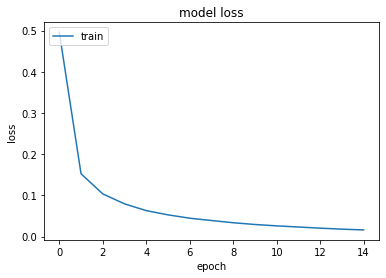

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

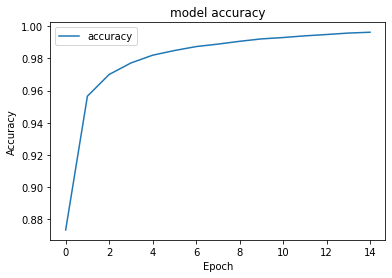

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 17

In [ ]:
#creat the model
model_17 = Sequential()

#conv layers

##first CNN layer
model_17.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_17.add(Activation("tanh"))

##second CNN layer
model_17.add(Conv2D(32,(2,2)))
model_17.add(Activation("tanh"))
model_17.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_17.add(Conv2D(64,(2,2)))
model_17.add(Activation("tanh"))
model_17.add(MaxPooling2D(pool_size=(2, 2)))

model_17.add(Flatten())

#FC layers

##first FC layer
model_17.add(Dense(64))
model_17.add(Activation("tanh"))

##second FC layer
model_17.add(Dense(32))
model_17.add(Activation("tanh"))

# softmax classifier
model_17.add(Dense(10))
model_17.add(Activation("softmax"))

model_17.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_102 (Activation)  (None, 27, 27, 16)       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_103 (Activation)  (None, 26, 26, 32)       0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [ ]:
model_17.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
history = model_17.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1565 - accuracy: 0.9556
Epoch 2/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0598 - accuracy: 0.9819
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0375 - accuracy: 0.9882
Epoch 5/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0328 - accuracy: 0.9899
Epoch 6/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0339 - accuracy: 0.9889
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 8/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0238 - accuracy: 0.9924
Epoch 9/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0239 - accuracy: 0.9922
Epoch 10/15
3000/3000 [==============================] - 19s 6ms/step - l

In [ ]:
loss, acc =model_17.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0553 - accuracy: 0.9851
loss = 0.05533182993531227
accuracy = 0.9850999712944031


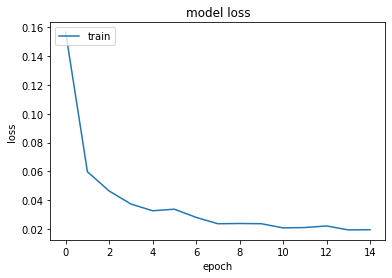

In [ ]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

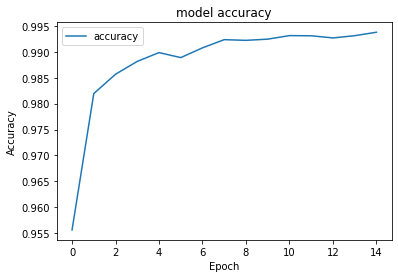

In [ ]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 18

In [20]:
#creat the model
model_18 = Sequential()

#conv layers

##first CNN layer
model_18.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_18.add(Activation("tanh"))

##second CNN layer
model_18.add(Conv2D(32,(2,2)))
model_18.add(Activation("tanh"))
model_18.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_18.add(Conv2D(64,(2,2)))
model_18.add(Activation("tanh"))
model_18.add(MaxPooling2D(pool_size=(2, 2)))

model_18.add(Flatten())

#FC layers

##first FC layer
model_18.add(Dense(64))
model_18.add(Activation("tanh"))

##second FC layer
model_18.add(Dense(32))
model_18.add(Activation("tanh"))

# softmax classifier
model_18.add(Dense(10))
model_18.add(Activation("softmax"))

model_18.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_6 (Activation)   (None, 27, 27, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_7 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        8256      
                                                      

In [21]:
model_18.compile(optimizer='RMSprop', loss="categorical_crossentropy", metrics=['accuracy'])
history = model_18.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 25s 8ms/step - loss: 0.1500 - accuracy: 0.9574
Epoch 2/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0550 - accuracy: 0.9832
Epoch 3/15
3000/3000 [==============================] - 23s 8ms/step - loss: 0.0396 - accuracy: 0.9883
Epoch 4/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0286 - accuracy: 0.9915
Epoch 5/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 6/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0158 - accuracy: 0.9952
Epoch 7/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0130 - accuracy: 0.9961
Epoch 8/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0104 - accuracy: 0.9968
Epoch 9/15
3000/3000 [==============================] - 22s 7ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 10/15
3000/3000 [==============================] - 22s 7ms/step - l

In [22]:
loss, acc =model_18.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0796 - accuracy: 0.9876
loss = 0.07962999492883682
accuracy = 0.9876000285148621


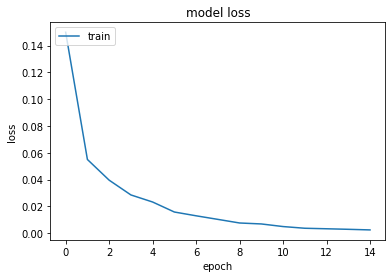

In [23]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

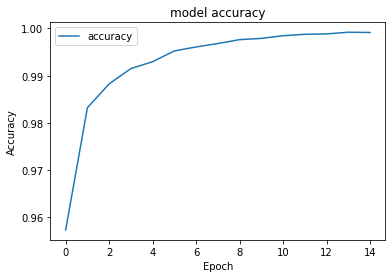

In [24]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 19

In [25]:
#creat the model
model_19 = Sequential()

#conv layers

##first CNN layer
model_19.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_19.add(Activation("tanh"))

##second CNN layer
model_19.add(Conv2D(32,(2,2)))
model_19.add(Activation("tanh"))
model_19.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_19.add(Conv2D(64,(2,2)))
model_19.add(Activation("tanh"))
model_19.add(MaxPooling2D(pool_size=(2, 2)))

model_19.add(Flatten())

#FC layers

##first FC layer
model_19.add(Dense(64))
model_19.add(Activation("tanh"))
model_19.add(Dropout(0.5))

##second FC layer
model_19.add(Dense(32))
model_19.add(Activation("tanh"))

# softmax classifier
model_19.add(Dense(10))
model_19.add(Activation("softmax"))

model_19.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_12 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        2080      
                                                                 
 activation_13 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)        8256      
                                                      

In [26]:
model_19.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_19.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4124 - accuracy: 0.8792
Epoch 2/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1587 - accuracy: 0.9529
Epoch 3/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1154 - accuracy: 0.9661
Epoch 4/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0951 - accuracy: 0.9712
Epoch 5/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0804 - accuracy: 0.9764
Epoch 6/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0715 - accuracy: 0.9786
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0673 - accuracy: 0.9791
Epoch 8/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0603 - accuracy: 0.9818
Epoch 9/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0552 - accuracy: 0.9830
Epoch 10/15
3000/3000 [==============================] - 19s 6ms/step - l

In [27]:
loss, acc =model_19.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0444 - accuracy: 0.9866
loss = 0.04437783360481262
accuracy = 0.9865999817848206


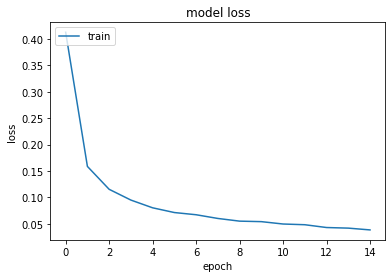

In [28]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

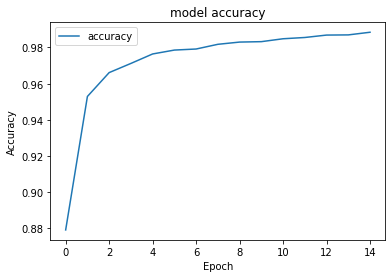

In [29]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 20

In [30]:
#creat the model
model_20 = Sequential()

#conv layers

##first CNN layer
model_20.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_20.add(Activation("tanh"))

##second CNN layer
model_20.add(Conv2D(32,(2,2)))
model_20.add(Activation("tanh"))
model_20.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_20.add(Conv2D(64,(2,2)))
model_20.add(Activation("tanh"))
model_20.add(MaxPooling2D(pool_size=(2, 2)))

model_20.add(Flatten())

#FC layers

##first FC layer
model_20.add(Dense(64))
model_20.add(Activation("tanh"))

##second FC layer
model_20.add(Dense(32))
model_20.add(Activation("tanh"))
model_20.add(Dropout(0.5))

# softmax classifier
model_20.add(Dense(10))
model_20.add(Activation("softmax"))

model_20.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 27, 27, 16)        80        
                                                                 
 activation_18 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_19 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 12, 12, 64)        8256      
                                                      

In [31]:
model_20.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_20.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.4115 - accuracy: 0.8826
Epoch 2/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1454 - accuracy: 0.9609
Epoch 3/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0981 - accuracy: 0.9734
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0778 - accuracy: 0.9791
Epoch 5/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0622 - accuracy: 0.9830
Epoch 6/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0549 - accuracy: 0.9852
Epoch 7/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0471 - accuracy: 0.9875
Epoch 8/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0407 - accuracy: 0.9896
Epoch 9/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0353 - accuracy: 0.9909
Epoch 10/15
3000/3000 [==============================] - 19s 6ms/step - l

In [32]:
loss, acc =model_20.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0433 - accuracy: 0.9883
loss = 0.043310072273015976
accuracy = 0.9883000254631042


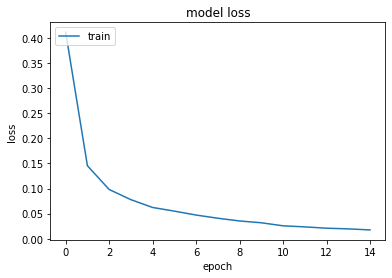

In [33]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

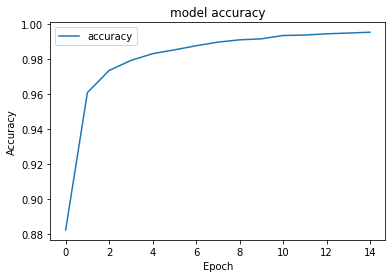

In [34]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 21

In [37]:
#creat the model
model_21 = Sequential()

#conv layers

##first CNN layer
model_21.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_21.add(Activation("tanh"))

##second CNN layer
model_21.add(Conv2D(32,(2,2)))
model_21.add(Activation("tanh"))
model_21.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_21.add(Conv2D(64,(2,2)))
model_21.add(Activation("tanh"))
model_21.add(MaxPooling2D(pool_size=(2, 2)))

model_21.add(Flatten())

#FC layers

##first FC layer
model_21.add(Dense(64))
model_21.add(Activation("tanh"))

##second FC layer
model_21.add(Dense(32))
model_21.add(Activation("tanh"))
model_21.add(Dropout(0.25))

# softmax classifier
model_21.add(Dense(10))
model_21.add(Activation("softmax"))

model_21.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_30 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_31 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 64)        8256      
                                                      

In [39]:
model_21.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_21.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 21s 7ms/step - loss: 0.0643 - accuracy: 0.9810
Epoch 2/15
3000/3000 [==============================] - 20s 7ms/step - loss: 0.0491 - accuracy: 0.9860
Epoch 3/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0409 - accuracy: 0.9876
Epoch 4/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0347 - accuracy: 0.9902
Epoch 5/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0283 - accuracy: 0.9915
Epoch 6/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0254 - accuracy: 0.9926
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0209 - accuracy: 0.9939
Epoch 8/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0174 - accuracy: 0.9949
Epoch 9/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0155 - accuracy: 0.9958
Epoch 10/15
3000/3000 [==============================] - 19s 6ms/step - l

In [40]:
loss, acc =model_21.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0349 - accuracy: 0.9898
loss = 0.034920308738946915
accuracy = 0.989799976348877


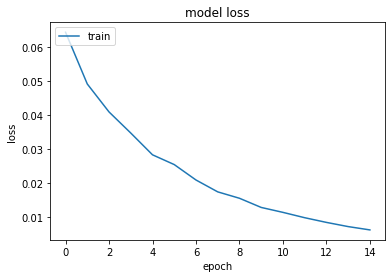

In [41]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

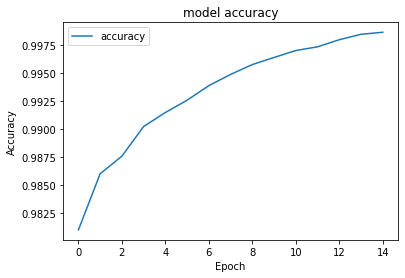

In [42]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 22

In [43]:
#creat the model
model_22 = Sequential()

#conv layers

##first CNN layer
model_22.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_22.add(Activation("tanh"))

##second CNN layer
model_22.add(Conv2D(32,(2,2)))
model_22.add(Activation("tanh"))
model_22.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_22.add(Conv2D(64,(2,2)))
model_22.add(Activation("tanh"))
model_22.add(MaxPooling2D(pool_size=(2, 2)))

model_22.add(Flatten())

#FC layers

##first FC layer
model_22.add(Dense(64))
model_22.add(Activation("tanh"))

##second FC layer
model_22.add(Dense(32))
model_22.add(Activation("tanh"))
model_22.add(Dropout(0.7))

# softmax classifier
model_22.add(Dense(10))
model_22.add(Activation("softmax"))

model_22.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_36 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_37 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        8256      
                                                      

In [44]:
model_22.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_22.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.5388 - accuracy: 0.8404
Epoch 2/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.2307 - accuracy: 0.9362
Epoch 3/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1648 - accuracy: 0.9554
Epoch 4/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1388 - accuracy: 0.9611
Epoch 5/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1217 - accuracy: 0.9654
Epoch 6/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1067 - accuracy: 0.9682
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1018 - accuracy: 0.9689
Epoch 8/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0872 - accuracy: 0.9731
Epoch 9/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0837 - accuracy: 0.9729
Epoch 10/15
3000/3000 [==============================] - 18s 6ms/step - l

In [45]:
loss, acc =model_22.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 5ms/step - loss: 0.0648 - accuracy: 0.9859
loss = 0.06482134759426117
accuracy = 0.9858999848365784


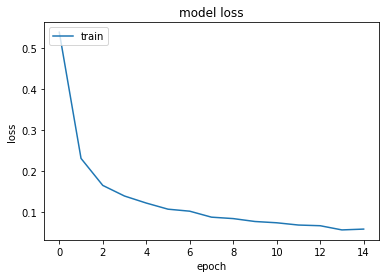

In [46]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

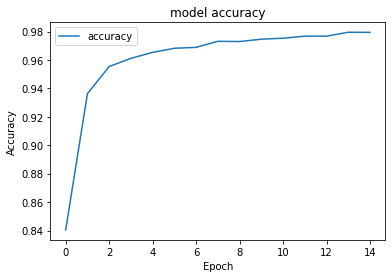

In [47]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

##Model 23

In [63]:
#creat the model
model_23 = Sequential()

#conv layers

##first CNN layer
model_23.add(Conv2D(16,(2,2),input_shape = train_images.shape[1:]))
model_23.add(Activation("tanh"))

##second CNN layer
model_23.add(Conv2D(32,(2,2)))
model_23.add(Activation("tanh"))
model_23.add(MaxPooling2D(pool_size=(2, 2)))

##third CNN layer
model_23.add(Conv2D(64,(2,2)))
model_23.add(Activation("tanh"))
model_23.add(MaxPooling2D(pool_size=(2, 2)))

model_23.add(Flatten())

#FC layers

##first FC layer
model_23.add(Dense(64))
model_23.add(Activation("tanh"))

##second FC layer
model_23.add(Dense(32))
model_23.add(Activation("tanh"))
model_23.add(Dropout(0.27))

# softmax classifier
model_23.add(Dense(10))
model_23.add(Activation("softmax"))

model_23.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 27, 27, 16)        80        
                                                                 
 activation_60 (Activation)  (None, 27, 27, 16)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 26, 26, 32)        2080      
                                                                 
 activation_61 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 64)        8256      
                                                     

In [64]:
model_23.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.03), loss="categorical_crossentropy", metrics=['accuracy'])
history = model_23.fit(train_images,train_labels,epochs=15,batch_size=20)

Epoch 1/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.3555 - accuracy: 0.8995
Epoch 2/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.1234 - accuracy: 0.9646
Epoch 3/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0840 - accuracy: 0.9756
Epoch 4/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0642 - accuracy: 0.9818
Epoch 5/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0492 - accuracy: 0.9858
Epoch 6/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0420 - accuracy: 0.9877
Epoch 7/15
3000/3000 [==============================] - 19s 6ms/step - loss: 0.0344 - accuracy: 0.9898
Epoch 8/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0283 - accuracy: 0.9920
Epoch 9/15
3000/3000 [==============================] - 18s 6ms/step - loss: 0.0231 - accuracy: 0.9939
Epoch 10/15
3000/3000 [==============================] - 18s 6ms/step - l

In [65]:
loss, acc =model_23.evaluate(test_images , test_labels)
print("loss =",loss)
print("accuracy =",acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0407 - accuracy: 0.9879
loss = 0.040682438760995865
accuracy = 0.9879000186920166


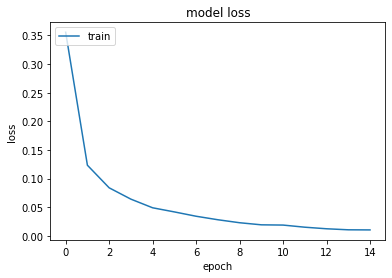

In [66]:
def plot_losses(history):  
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()
plot_losses(history)

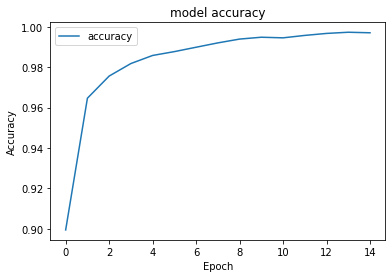

In [67]:
def plot_accuracies(history):  
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.title('model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')
    plt.show()
plot_accuracies(history)

###best model is 21

#Test model by draw of number we make it

In [87]:
import cv2 

In [95]:
test_img = cv2.imread('/content/5.png')

(405, 362, 3)

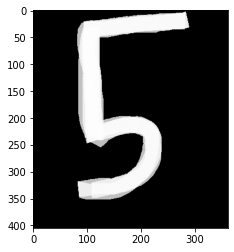

In [96]:
plt.imshow(test_img)
test_img.shape

In [97]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
test_img.shape

(405, 362)

In [98]:
test_img = cv2.resize(test_img, (28,28), interpolation = cv2.INTER_AREA )
test_img.shape

(28, 28)

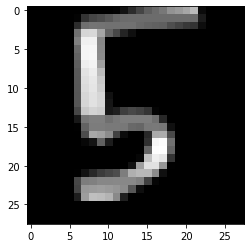

In [99]:
test_img = tf.keras.utils.normalize(test_img,axis = 1)
plot_img(test_img)

In [100]:
test_img = reshape_img(np.array(test_img))
test_img.shape

(1, 28, 28, 1)

In [101]:
p = model_21.predict(test_img)
print(np.argmax(p))

5
